#🐶 End-to-end Multi-class Dog Breed Classification
This notebook builds and end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub

## Problem
Identifying the breed of a dog given an image of a dog

## Data
https://www.kaggle.com/competitions/dog-breed-identification/data

## Evaluation
the evalution is a file with prediction probabilities for each dog breed of each test shape

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## Features
* we're dealing with images (unstructured data) so it's proabbly best we use deep learning/transfer learning.
* there are 120 breeds of dogs(120 different classes)
* There are 10000+ images in training set (these images have labels)
* There are 10000+ images in test set (these images have no labels, because we'll want to predict them).

In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip "drive/MyDrive/dog-vision/dog-breed-identification.zip" -d "drive/MyDrive/dog-vision/"

### Get our workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [ ]:
# Import neccessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YES!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.12.0
TF Hub version: 0.13.0
GPU not available :(


## Getting our data ready (turning into Tensors)

with all machine learning models, our data has to be in numrical format. so that's what we'll be doing first. Turning images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: >

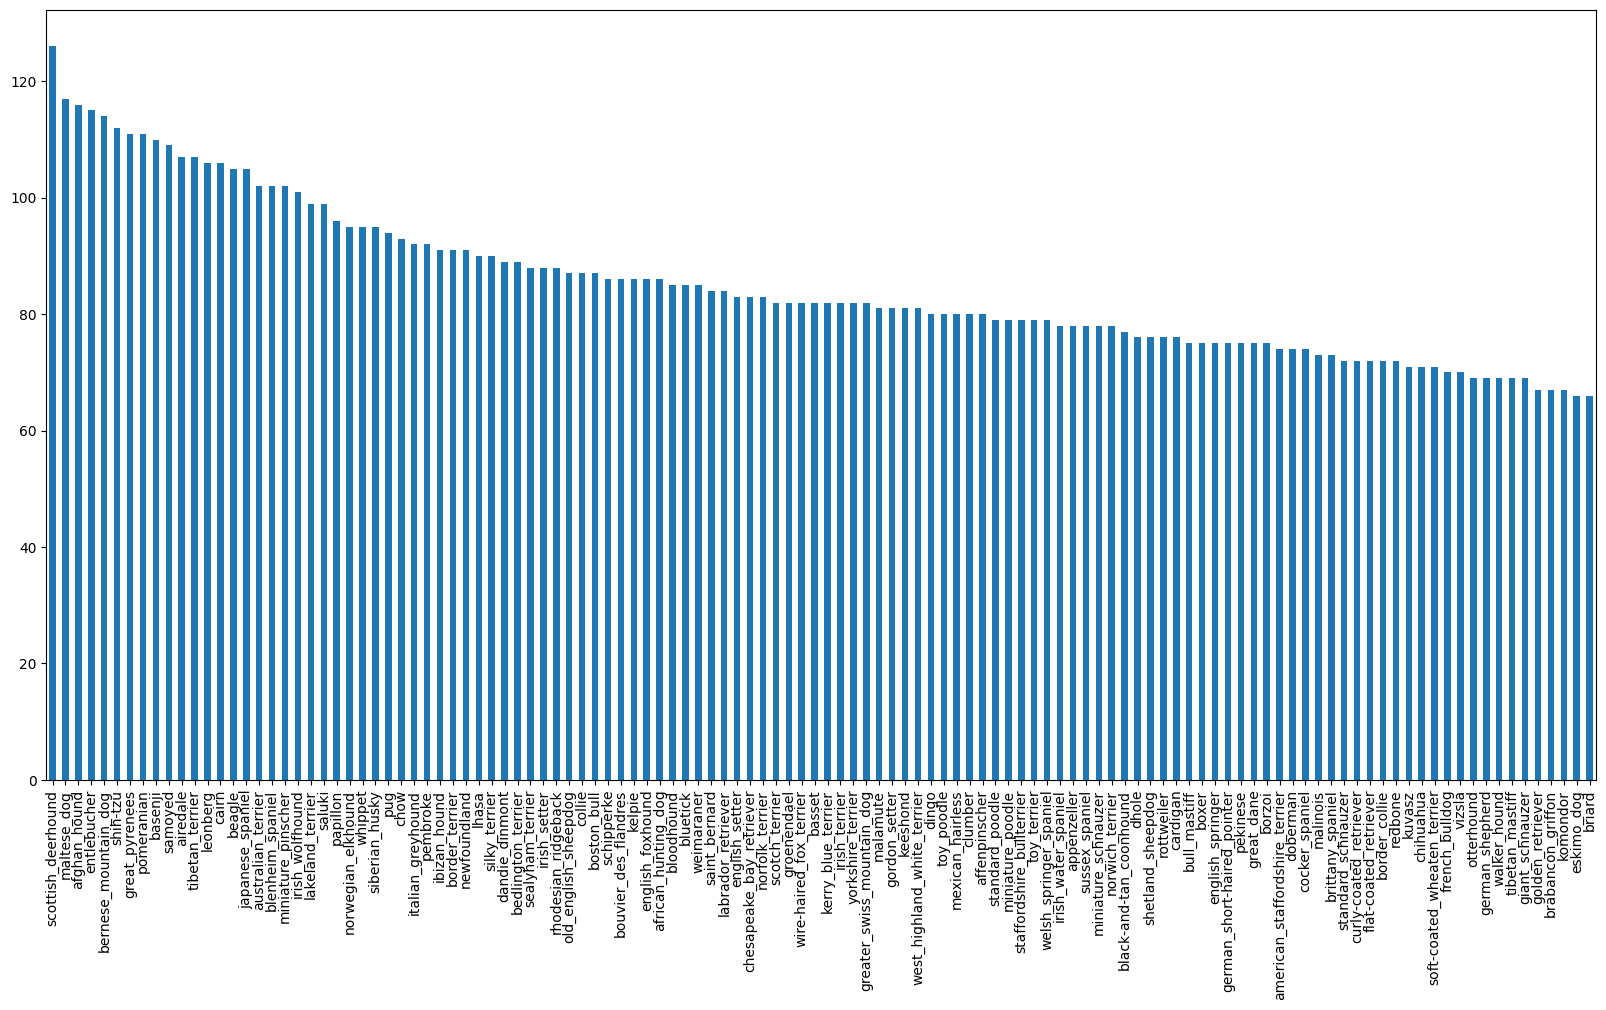

In [ ]:
# How Many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

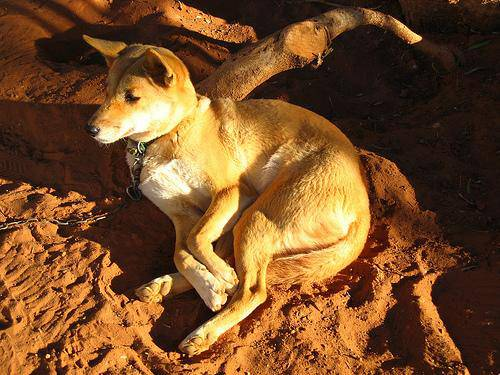

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their labels

Let's get a list of our image file pathnames

In [ ]:
# Create pathnames from image's ID's
filenames = ["drive/MyDrive/dog-vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

In [ ]:
filenames[:10]

['drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/dog-vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


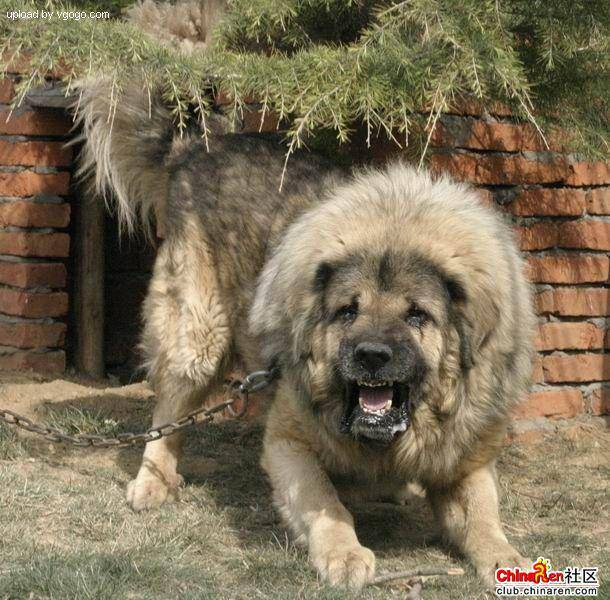

In [ ]:
# One more check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels)

In [ ]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not matches number of filenames, check data directories!!")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn every label into a boolen array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example : Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds==labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [ ]:
# setup x and y variable
x = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed

In [ ]:
# Set number of images used for experimenting
NUM_IMAGES = 3000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Lets split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a gaze at the training data
x_train[:5], y_train[:2]

(['drive/MyDrive/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

### Preprocessing Images (turning images into Tensors)
To preprocess our images into tensors we're going to write a function which does a few things:
* Take an image filepath as input
* Use TensorFlow to read the file and save it to a variable, `image`
* Turn our `image` (a jpg) into Tensors
* Resize the `image` to be a shape of (224, 224)
* Return the modified `image`

Before we do, let's see what importing an image looks like.

In [ ]:
# Create image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# Turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Now we've seen what an image looks like as a tensor, let's make a function to preprocess them.

* Take an image filepath as input
* Use TensorFlow to read the file and save it to a variable, `image`
* Turn our `image` (a jpg) into Tensors
* Normalize our image (convert color channel values from 0-255 to 0-1).
* Resize the `image` to be a shape of (224, 224)
* Return the modified `image`

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 244)
  image = tf.image.resize(image, size=[img_size, img_size])
  
  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is batch size) images at a time (you can manually adjust the batch size if need to be)

in order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form :
`(image, label)`, let's make a function to turn all of our data (`x` & `y`) into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # if the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches...")
    # turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data=create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

Our data is now in batches however these can be a little hard to understand/comprehend, let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing image in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # display an image
    plt.imshow(images[i])
    # add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

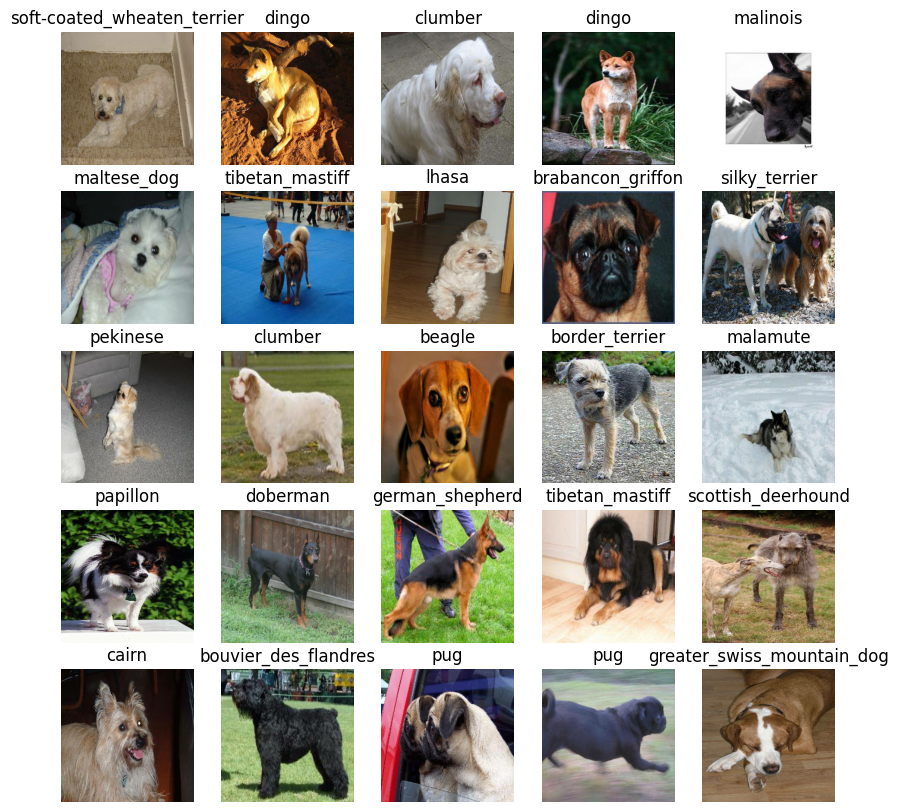

In [ ]:
# now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

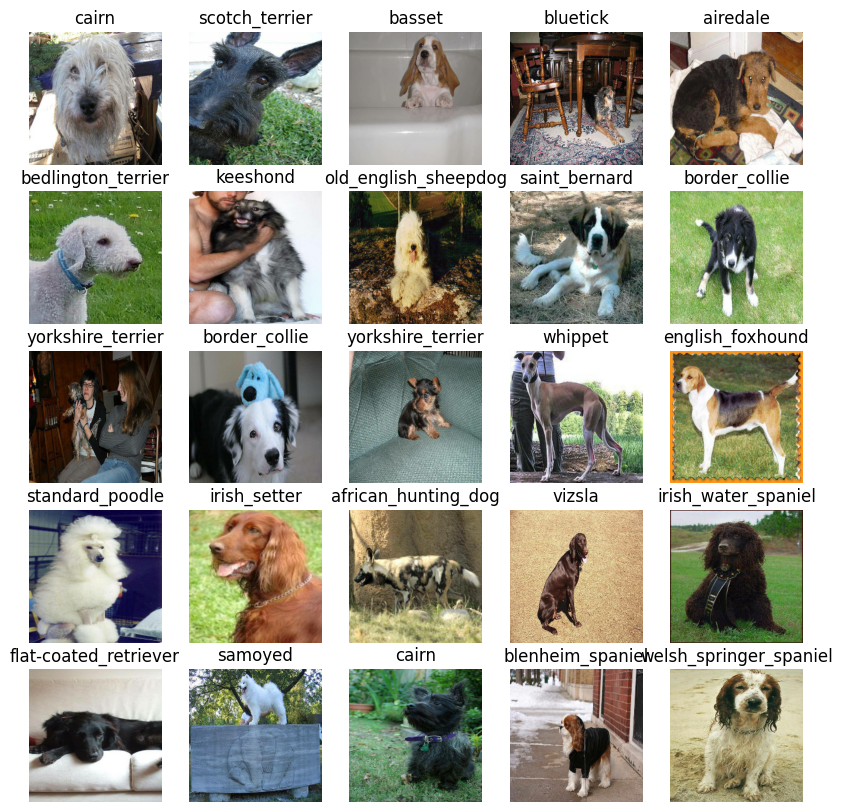

In [ ]:
# now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are few things we need to define :
* the input shape ( our image shape, in the form of Tensors) to our model.
* the output shape (image labels iin the form of tensors) of our model.
* the URL of the model we want to use from tensorflow hub

In [ ]:
# setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch , height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we 've got our inputs, outputs and model ready to go.
let's put them together into a keras deep learning model!

Knowing this let's create a function which:
* takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in sequential fashion (do this first, then this, then that).
* compiles the model (says it should be evaluated and improved).
* Build the model (tells the model the input shape it'll be getting).
* Return the model.

In [ ]:
# Create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), # layer 1 (input layer)
      tf.keras.layers.Dense(units=output_shape, activation="softmax") # layer 2 (output layer)
  ])

  # compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our model progress and another for early stopping which prevents our model from training for too long.

### Tensorboard Callback

to setup a tensorboard callback, we need to do 3 things:
* Load the tensorBoard notebook extension
* Create a tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
* Visualize the models training logs with the `%tensorboard` magic function (we'll do this after model training).



In [ ]:
# Load Tensorboard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a funtion to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/dog-vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.



In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)


## Training a model (on subset of data)

our first model is only going to train on 1000 images, to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# check to make sure we're still running on a GPU
print("GPU", "available (YESSSS!!!!!!") if tf.config.list_physical_devices("GPU") else "not available :("

'not available :('

Let's create a function which trains a model.
* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epoch to train for (`NUM_EPOCHS`) and the callback we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  # create a model
  model = create_model()

  # create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data passing it the callbacks we created
  model.fit(x=train_data, epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 462s 19s/step - loss: 4.5743 - accuracy: 0.1013 - val_loss: 3.4926 - val_accuracy: 0.2450
Epoch 2/100
25/25 [==============================] - 72s 3s/step - loss: 1.6148 - accuracy: 0.6888 - val_loss: 2.2172 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 65s 3s/step - loss: 0.5668 - accuracy: 0.9400 - val_loss: 1.6931 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 72s 3s/step - loss: 0.2597 - accuracy: 0.9850 - val_loss: 1.4956 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 68s 3s/step - loss: 0.1474 - accuracy: 0.9987 - val_loss: 1.4254 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 71s 3s/step - loss: 0.1015 - accuracy: 0.9987 - val_loss: 1.3823 - val_accuracy: 0.6200
Epoch 7/100
25/25 [==============================] - 82s 3s

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.


In [ ]:
%tensorboard --logdir drive/MyDrive/dog-vision/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions


7/7 [==============================] - 17s 2s/step


array([[4.39970661e-03, 1.13282105e-04, 2.65318260e-04, ...,
        1.13447517e-04, 5.38273925e-05, 2.94672302e-03],
       [2.03458988e-03, 5.30229299e-04, 1.69713516e-02, ...,
        7.12006149e-05, 2.78793066e-03, 4.53627799e-05],
       [1.78846932e-07, 7.32608669e-06, 1.16562694e-06, ...,
        5.31725618e-06, 3.57479371e-06, 6.06854010e-05],
       ...,
       [7.88684076e-07, 4.17099109e-05, 1.44932477e-04, ...,
        9.55271662e-06, 3.46489469e-05, 9.21392257e-06],
       [9.71231982e-03, 5.72980935e-05, 9.59908502e-05, ...,
        1.84964389e-04, 8.55236940e-05, 1.83493178e-02],
       [6.98574877e-04, 3.48419780e-05, 1.50563510e-03, ...,
        4.23883926e-03, 3.47058638e-04, 9.65413856e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
# First prediction
index=42
print(predictions[0])
print(f"Max value (probability of prediction) : {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[index])]}")

[4.39970661e-03 1.13282105e-04 2.65318260e-04 8.36204854e-05
 4.03321610e-04 2.15693162e-05 1.08296216e-01 5.61642635e-04
 4.58533359e-05 5.28080855e-04 4.90780338e-04 1.83885350e-04
 2.22497139e-04 7.93168947e-05 7.98241817e-05 3.40745598e-03
 3.77241158e-05 3.01859707e-01 2.84535581e-05 5.67670795e-05
 3.67137633e-04 1.03627652e-04 1.33735239e-05 1.31261616e-03
 1.18994240e-05 1.21882978e-04 1.25720963e-01 5.81346685e-05
 1.08979433e-03 8.52313824e-04 1.99145987e-04 2.39519263e-03
 3.70097958e-04 5.80757342e-06 2.43455324e-05 6.40755426e-03
 1.71358879e-05 2.24329066e-04 1.23498830e-04 2.05866909e-05
 1.57919596e-03 2.00155118e-05 2.92012410e-05 7.87458994e-05
 1.72989530e-04 8.20374553e-05 2.46411582e-05 2.93052057e-04
 1.62760116e-04 2.74965387e-05 1.08521388e-04 2.02609153e-05
 1.23614480e-03 3.56928758e-05 2.83663976e-04 6.66894266e-05
 3.24000022e-04 5.94009645e-03 2.36814798e-04 3.09337638e-02
 2.86117225e-04 8.58569401e-05 1.52515527e-03 1.02482445e-05
 7.53139379e-04 3.279276

from keras.saving.legacy.saved_model.layer_serialization import LayerSavedModelSaver
Having the above functionality is great but we want to be able to do it at scale.

and it would be even better if we could see the image prediction is being made on!

**Note:** Prediction probability are also knows as confidence Levels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array o fprediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'irish_setter'

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and label.
  """
  images, labels = [], []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
* Prediction labels
* Validation labels(truth labels)
* Validation id
### Function to visualize which
* Takes an array of predicition probabilities, an array of truth labels and an array of images and and integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot


In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color="green"
  else:
    color="red"

  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100,
                                    true_label), color = color)

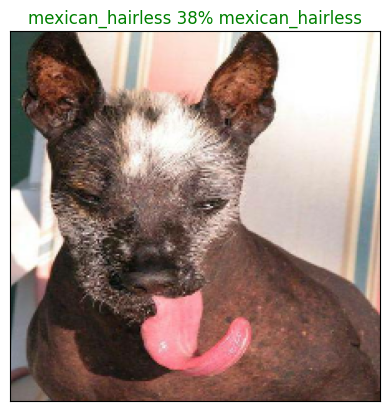

In [ ]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=33)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass



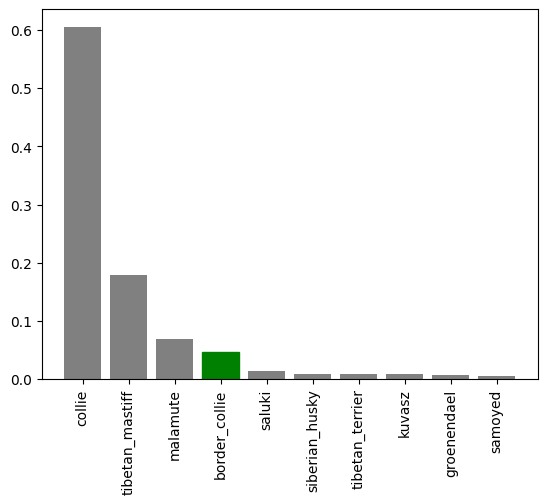

In [ ]:
plot_pred_conf(predictions, val_labels, n=9)

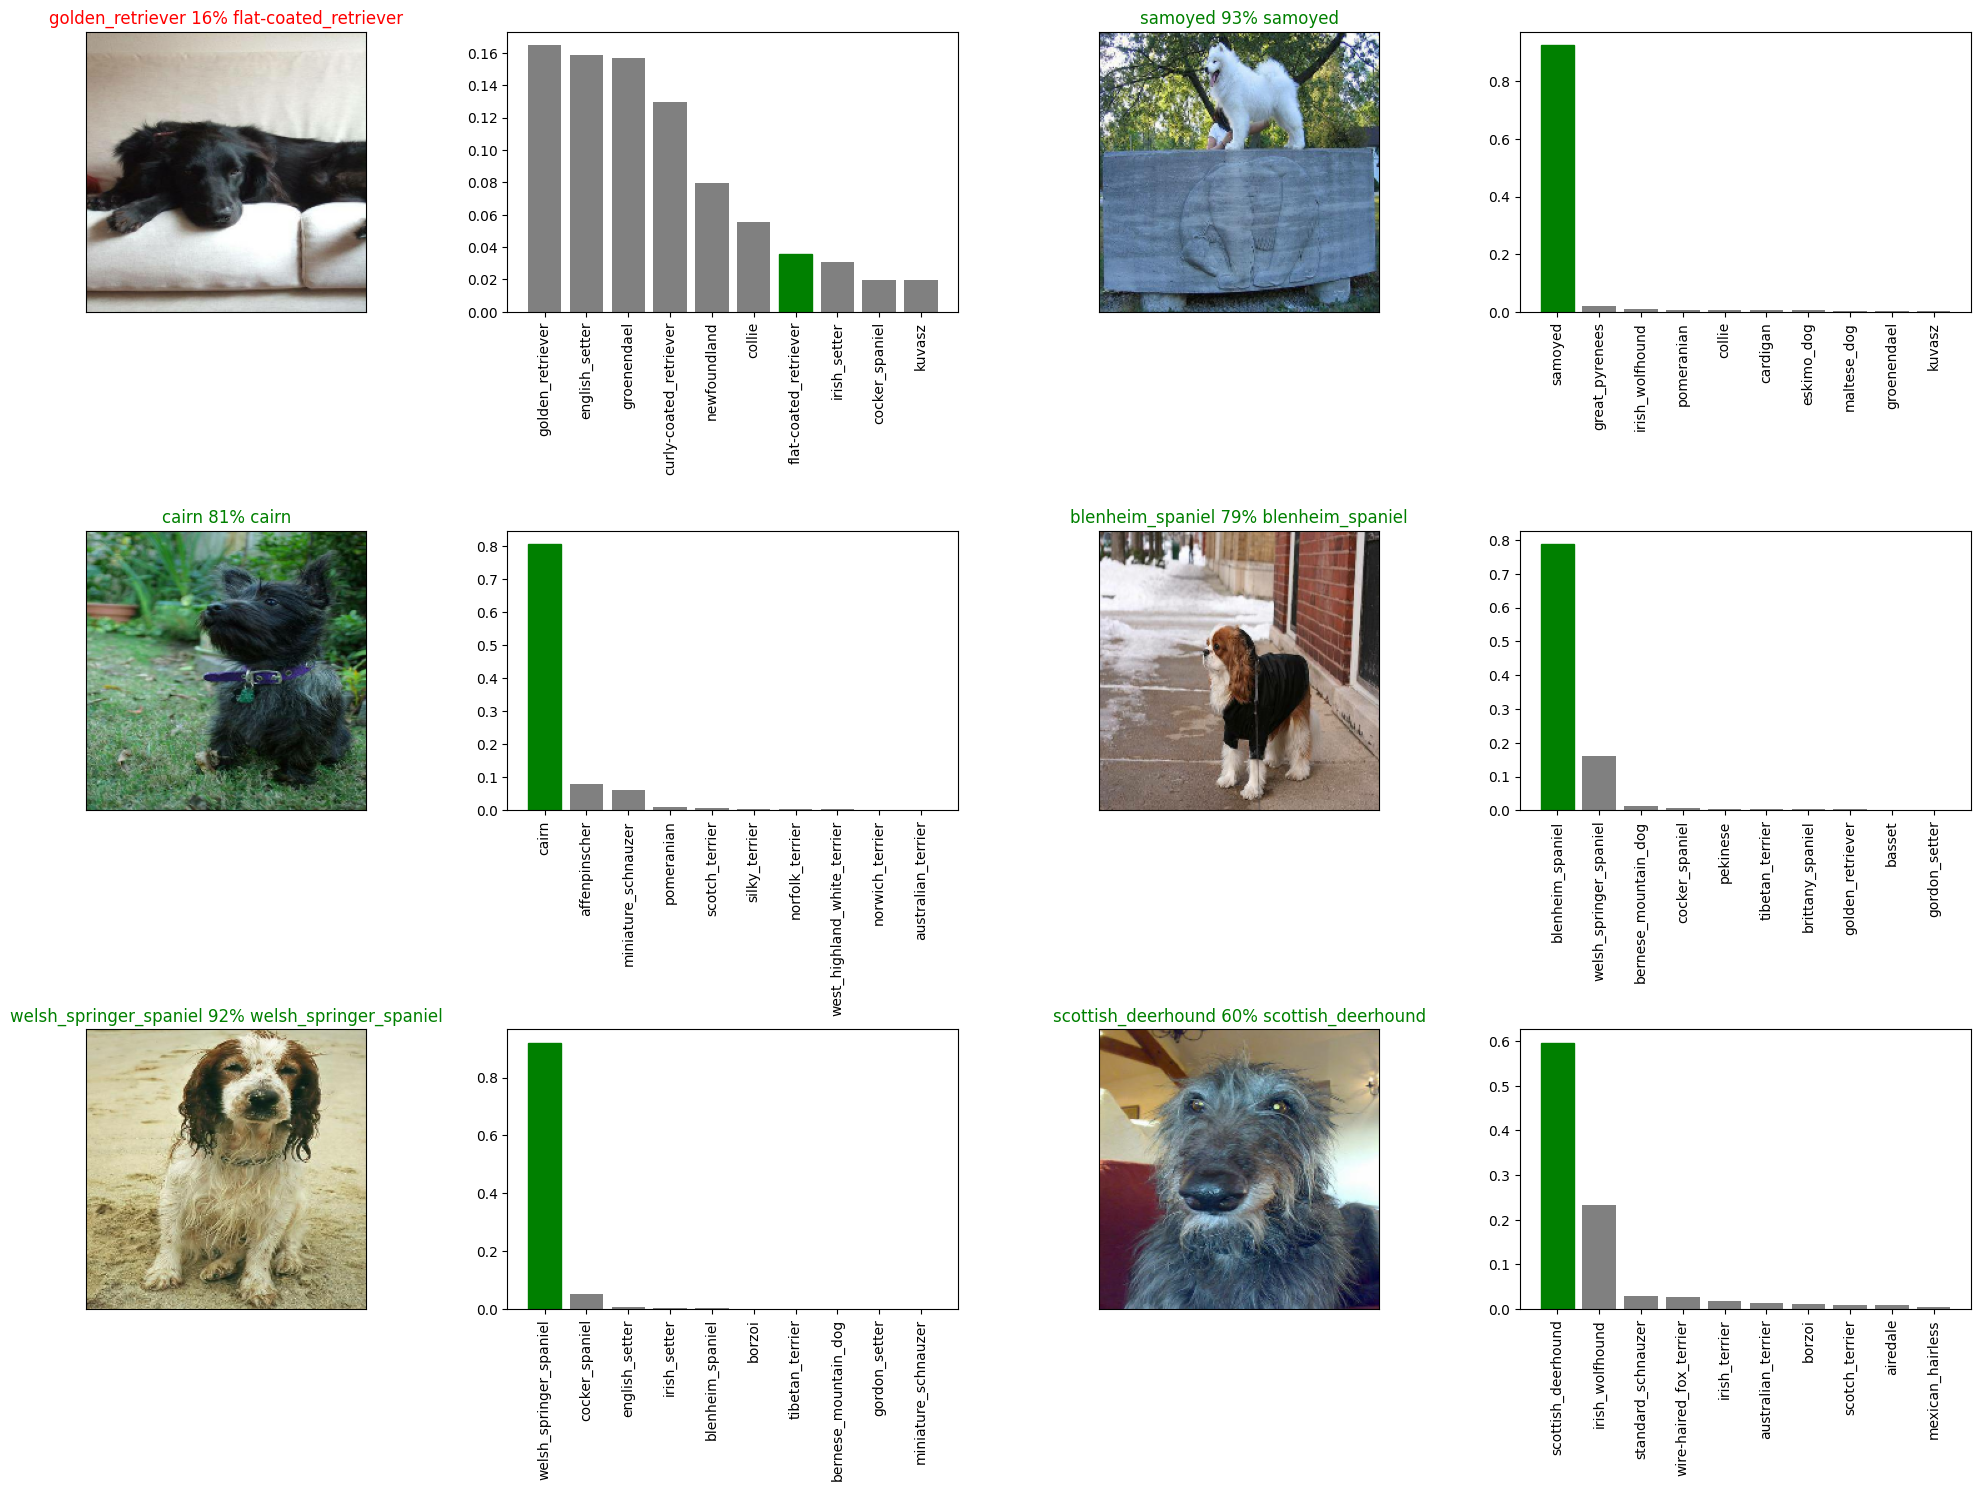

In [ ]:
i_multiplier = 20
num_rows = 3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions, val_labels, val_images, n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions, val_labels, n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model, suffix=None):
  modeldir = os.path.join("drive/MyDrive/dog-vision/models", datetime.datetime.now().strftime("%Y%m%%d-%H%M%S"))

  model_path = modeldir+"-"+suffix+".h5"
  print(f"Saving model to : {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  print(f"Loading saved model from : {model_path}")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to : drive/MyDrive/dog-vision/models/202304%d-053003-1000-images-mobilenetv2-Adam.h5...


'drive/MyDrive/dog-vision/models/202304%d-053003-1000-images-mobilenetv2-Adam.h5'

In [ ]:
loaded_image_model = load_model("drive/MyDrive/dog-vision/models/202304%d-164230-1000-images-mobilenetv2-Adam.h5")

Loading saved model from : drive/MyDrive/dog-vision/models/202304%d-164230-1000-images-mobilenetv2-Adam.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 12s 2s/step - loss: 1.2228 - accuracy: 0.6700


[1.2227864265441895, 0.6700000166893005]

In [ ]:
loaded_image_model.evaluate(val_data)

7/7 [==============================] - 14s 2s/step - loss: 1.2403 - accuracy: 0.6750


[1.240309238433838, 0.675000011920929]

In [ ]:
full_data = create_data_batches(x, y)

Creating training data batches...


In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)


In [ ]:
full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 647s 2s/step - loss: 1.3524 - accuracy: 0.6658
Epoch 2/100
320/320 [==============================] - 634s 2s/step - loss: 0.4028 - accuracy: 0.8800
Epoch 3/100
210/320 [==================>...........] - ETA: 3:44 - loss: 0.2171 - accuracy: 0.9418

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
loaded_full_model = load_model("drive/MyDrive/dog-vision/models/202304%d-173436-full-image-set-mobilenetv2-Adam.h5")